# Jupyter Notebook demo using Python

In this notebook we demonstrate the use of Python in Jupyter Notebook. 

In our example we
- Download the iris dataset, describing data collected on flowers.
- Explore the dataset
- Apply simple dimensionality reduction algorithm.

In [1]:
# Load dependencies
import pandas as pd # for data wrangling
%matplotlib notebook
import matplotlib.pyplot as plt # for plots
import seaborn as sns # for improved plot look
import matplotlib.patches as mpatches # additional plotting stuff
from matplotlib.colors import ListedColormap # additional plotting stuff
from mpl_toolkits.mplot3d import Axes3D # 3D axes

## Get data

In [2]:
def get_iris_data():
    """
    This function imports iris dataset
    from scikit learn dataset collection
    and saves is at .csv.
    """
    from sklearn import datasets
    iris = datasets.load_iris()
    df = pd.DataFrame(iris.data)
    df = pd.concat([df, pd.DataFrame(iris.target)], axis = 1)
    names = [x.replace(' (cm)', '') for x in iris.feature_names]
    df.columns = names + ['type']
    df.to_csv("iris_data.csv",index=False)

In [3]:
# Save iris dataset as .csv, already done
#get_iris_data()

In [4]:
# Load iris dataset from .csv
df = pd.read_csv("iris_data.csv")

# Save variable "type_names": setosa (0), versicolor (1), virginica(2)
type_names = ['setosa', 'versicolor', 'virginica']

# Display first observations in data
df.head()

,sepal length,sepal width,petal length,petal width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Some simple descriptive statistics
df.describe()

,sepal length,sepal width,petal length,petal width,type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# Assign features (exogenous variabes) to variable "X" 
# and target (dependent variable) to variable "y"
X = df.copy()
del X['type']
y = df['type']

In [7]:
display(X.head())

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
display(y.head())

0    0
1    0
2    0
3    0
4    0
Name: type, dtype: int64

## Two-dimensional scatter plot
Now that we loaded the data, let's do some plotting. We will first illustrate the data in two feature dimensions.

<IPython.core.display.Javascript object>


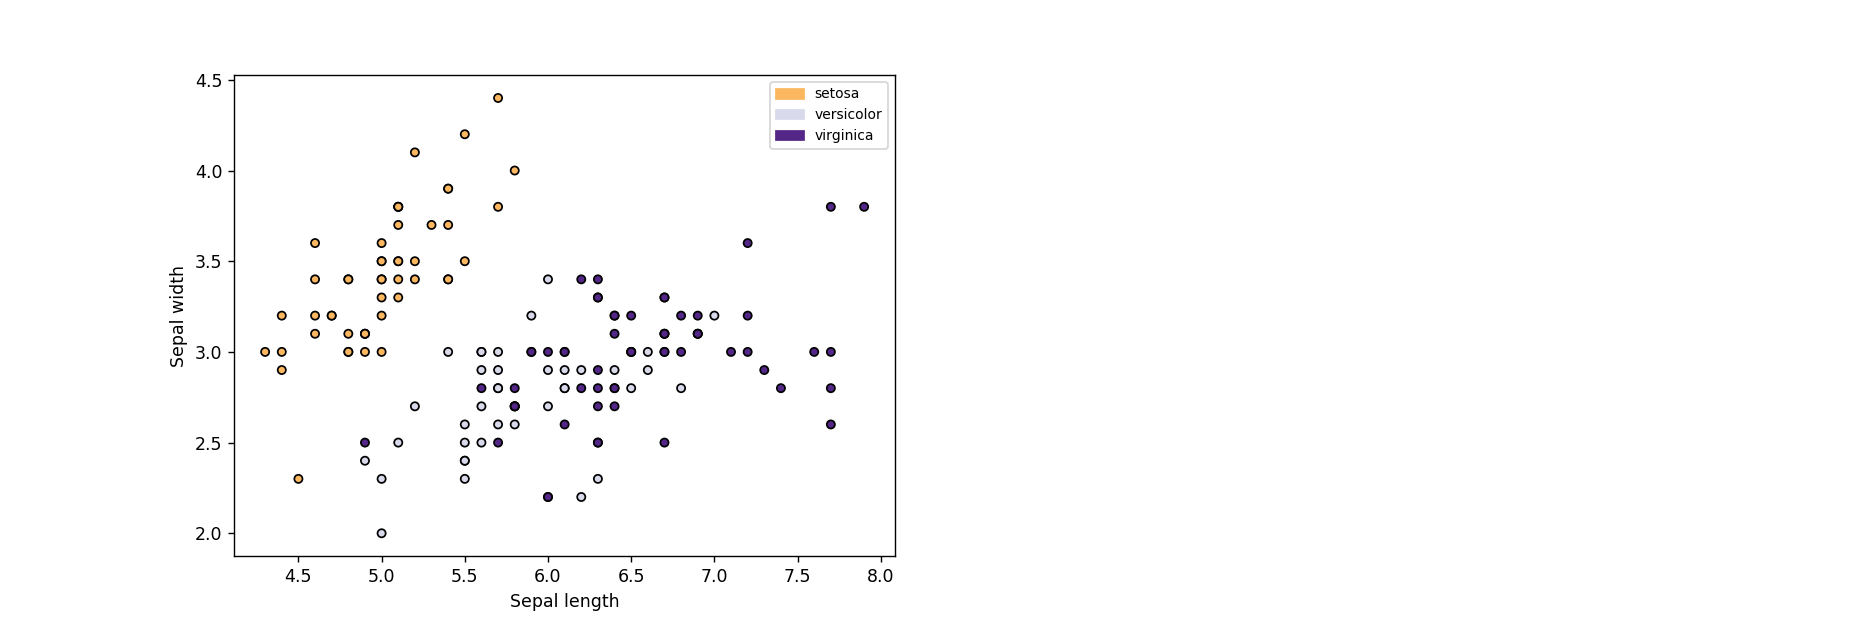

In [9]:
# Figure and axis
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)

# Color map
cmap = plt.cm.PuOr
colors = []
colors.append(cmap(0.3)); colors.append(cmap(0.6)); colors.append(cmap(0.9))
cmap = cmap.from_list('Custom cmap', colors, 3)

# Draw scatter
ax.scatter(X['sepal length'], X['sepal width'], c = y, cmap = cmap, edgecolor = 'k', s = 22)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')

# legend
patch1 = mpatches.Patch(color = cmap(0), label = type_names[0])
patch2 = mpatches.Patch(color = cmap(1), label = type_names[1])
patch3 = mpatches.Patch(color = cmap(2), label = type_names[2])
patches = [patch1, patch2, patch3]
ax.legend(handles = patches, loc='upper right',fontsize = 8)


As we see, in these two feature dimensions setosa observations are easily linearly separable. The other two less so. Let us aplly dimensionality reduction on the full feature space in order to find a low-dimensional representation where the two other classes could perhaps be more easily separated. 

## Apply Principal Component Analysis to reduce dimensionality
Recall that for <i>k</i>th component

$$\mathbf{\hat{X}}_k = \mathbf{X} - \sum_{s=1}^{k-1} \mathbf{X} \mathbf{w}_{(s)} \mathbf{w}_{(s)}^{T}$$

See PCA page in <a href="https://en.wikipedia.org/wiki/Principal_component_analysis">Wikipedia</a>.

In [10]:
# Apply PCA to data to reduce feature dimesions from 4 to 3

# Import PCA algorithm
from sklearn.decomposition import PCA

# Initialize PCA object
pca = PCA(n_components = 3)

# Apply PCA
X_pca = pd.DataFrame(pca.fit_transform(X))

In [11]:
# Display first observations from reduced feature data
X_pca.head()

,0,1,2
0,-2.684207,0.326607,-0.021512
1,-2.715391,-0.169557,-0.203521
2,-2.889820,-0.137346,0.024709
3,-2.746437,-0.311124,0.037672
4,-2.728593,0.333925,0.096230


## Plot PCAs in 3D scatter plot

<IPython.core.display.Javascript object>


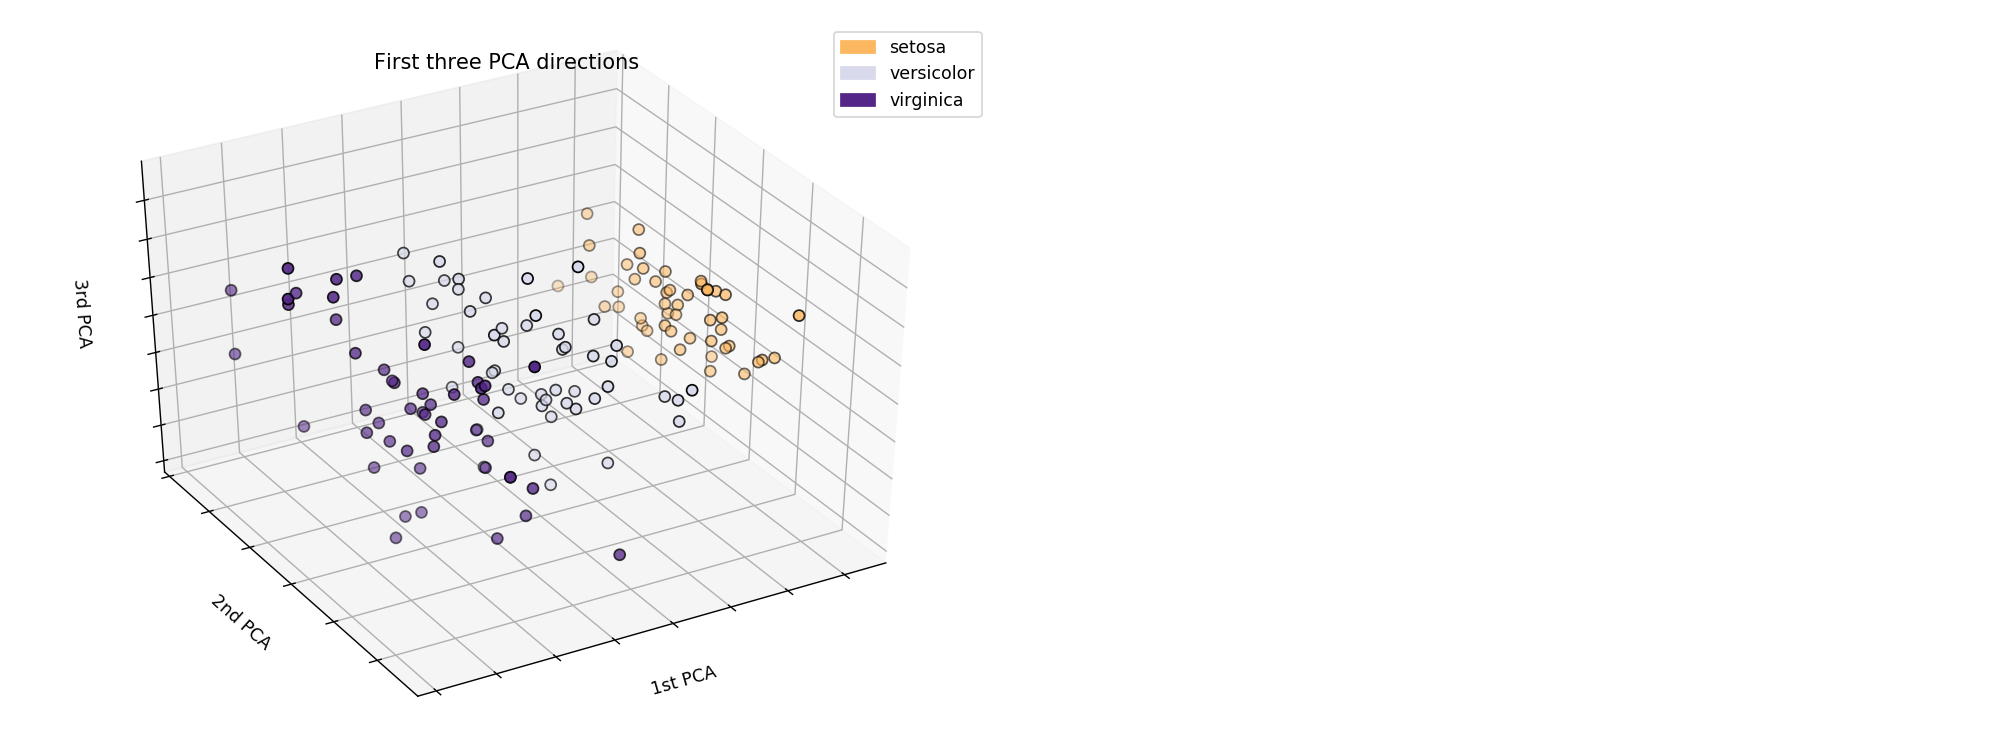

In [12]:
# Figure and axis
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(121, projection='3d')

# Color map
cmap = plt.cm.PuOr
colors = []
colors.append(cmap(0.3)); colors.append(cmap(0.6)); colors.append(cmap(0.9))
cmap = cmap.from_list('Custom cmap', colors, 3)

# Draw scatter
ax.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], X_pca.iloc[:, 2], c=y,
           cmap=cmap, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st PCA")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd PCA")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd PCA")
ax.w_zaxis.set_ticklabels([])
ax.view_init(azim = 110, elev = -150)

# Legend
patch1 = mpatches.Patch(color = cmap(0), label = type_names[0])
patch2 = mpatches.Patch(color = cmap(1), label = type_names[1])
patch3 = mpatches.Patch(color = cmap(2), label = type_names[2])
patches = [patch1, patch2, patch3]
ax.legend(handles = patches, loc='upper right')

fig.tight_layout()


Class type setosa observation are even more clearly separated from other observations. For the other two things got a little better but still some overlap.